In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from datetime import datetime

np.random.seed(1)
print(tf.__version__)

2.10.0


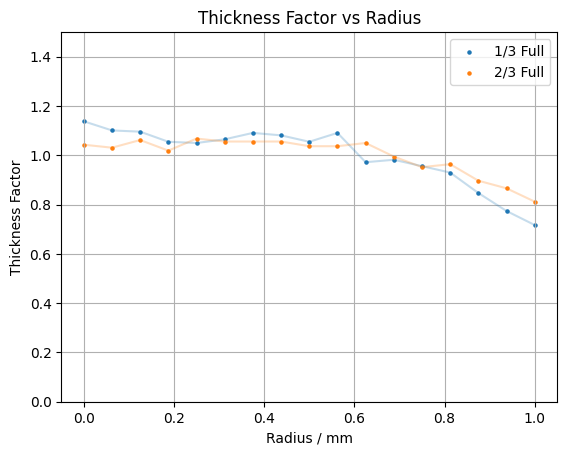

In [2]:
# Data
radii = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
thickness_factors1 = [1.138, 1.101, 1.096, 1.055, 1.05, 1.065, 1.091, 1.081, 1.055, 1.091, 0.972, 0.982, 0.956, 0.93, 0.847, 0.774, 0.717]
thickness_factors2 = [1.043, 1.031, 1.062, 1.019, 1.068, 1.056, 1.056, 1.056, 1.037, 1.037, 1.05, 0.995, 0.952, 0.964, 0.897, 0.866, 0.812]

max_radius = max(radii)
radii_norm = np.array(radii)/max_radius
thickness_factors1 = np.array(thickness_factors1)
thickness_factors2 = np.array(thickness_factors2)

plt.scatter(radii_norm, thickness_factors1, label='1/3 Full', s=5)
plt.scatter(radii_norm, thickness_factors2, label='2/3 Full', s=5)
plt.plot(radii_norm, thickness_factors1, alpha=0.25)
plt.plot(radii_norm, thickness_factors2, alpha=0.25)
plt.xlabel('Radius / mm')
plt.ylabel('Thickness Factor')
plt.title('Thickness Factor vs Radius')
plt.ylim(0, 1.5)
plt.legend()
plt.grid()
plt.show()

#### 1D Fit
t = f(r)

In [3]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='gelu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='gelu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(radii_norm, thickness_factors2, epochs=5000, verbose=0)

In [15]:
# Generate predictions
radii_test = np.arange(0, 170, 1)/160
y_pred = model.predict(radii_test)

# Plot the results
# plt.scatter(x_test, y_test, label='Actual', s=3)
plt.scatter(radii_norm, thickness_factors2, s=3, c='C0')
plt.plot(radii_test, y_pred, label='Predicted')
plt.xlabel('Normalised Radius')
plt.ylabel('Thickness Factor')
plt.ylim(0, 1.5)
plt.title('Thickness Factor vs Normalised Radius')
plt.legend()
plt.grid()
plt.show()

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/dense_3/BiasAdd' defined at (most recent call last):
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Sgp59975\AppData\Local\Temp\ipykernel_23316\476649463.py", line 3, in <module>
      y_pred = model.predict(radii_test)
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Sgp59975\Anaconda3\envs\tf-env\lib\site-packages\keras\layers\core\dense.py", line 252, in call
      outputs = tf.nn.bias_add(outputs, self.bias)
Node: 'sequential_1/dense_3/BiasAdd'
In[0] and In[1] has different ndims: [32] vs. [2,128]
	 [[{{node sequential_1/dense_3/BiasAdd}}]] [Op:__inference_predict_function_271102]

#### 2D Fit
t = f(r,f)

In [5]:
full1 = 0.333
full2 = 0.667

X_train = []
for i in range(len(radii_norm)):
    X_train += [[radii_norm[i], full1]]
for i in range(len(radii_norm)):
    X_train += [[radii_norm[i], full2]]
X_train = np.array(X_train)
print(f'X_train.shape = {X_train.shape}')

y_train = np.append(thickness_factors1, thickness_factors2)
print(f'y_train.shape = {y_train.shape}')


X_train.shape = (34, 2)
y_train.shape = (34,)


In [6]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='gelu', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='gelu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=30000, verbose=0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,705
Trainable params: 8,705
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Save the model
optional_desc = ''
dt = datetime.now().strftime('%y%m%d-%H%M')
if optional_desc == '':
    optional_desc = 'model'
model_path = f'ebeam/models/{optional_desc}-{dt}.h5'
model.save(model_path)

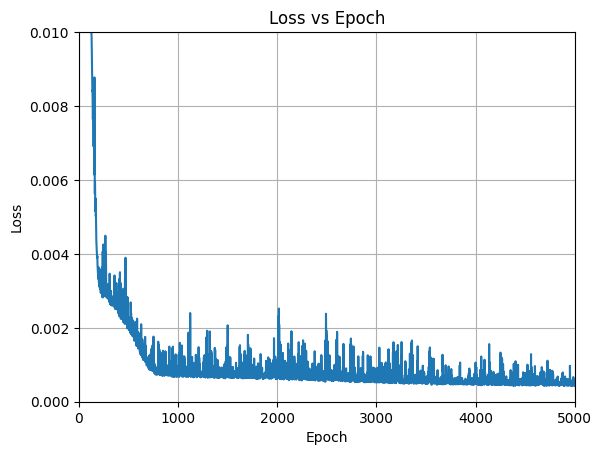

In [8]:
# Plot loss vs epochs
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0, 5000)
plt.ylim(0, 0.01)
plt.title('Loss vs Epoch')
plt.grid()
plt.show()

54/54 [==============================] - 0s 906us/step


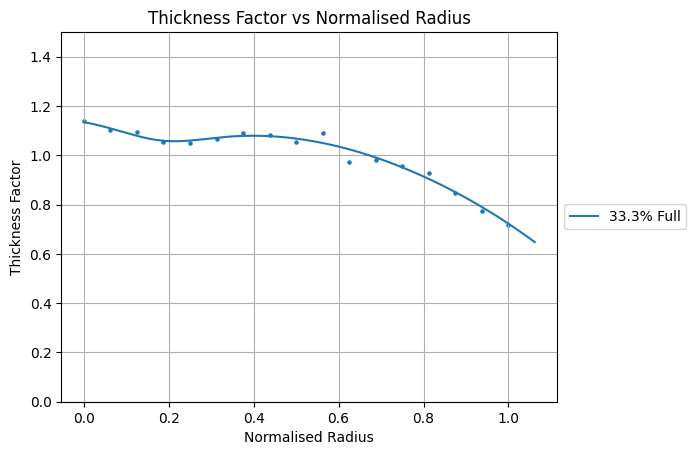

In [24]:
def plot_trained(full, color=None):

    radii_ls = np.arange(0, 170, 0.1)/160
    full_ = np.ones(radii_ls.shape)*full

    X_test = np.column_stack((radii_ls, full_))
    y_test = model.predict(X_test)

    label = f'{full*100:.1f}% Full'
    plt.plot(X_test[:, 0], y_test, color=color, label=label)

# Plot the results

plot_trained(0.333)
plt.scatter(radii_norm, thickness_factors1, s=5)
plt.xlabel('Normalised Radius')
plt.ylabel('Thickness Factor')
plt.title('Thickness Factor vs Normalised Radius')
plt.ylim(0, 1.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

54/54 [==============================] - 0s 811us/step


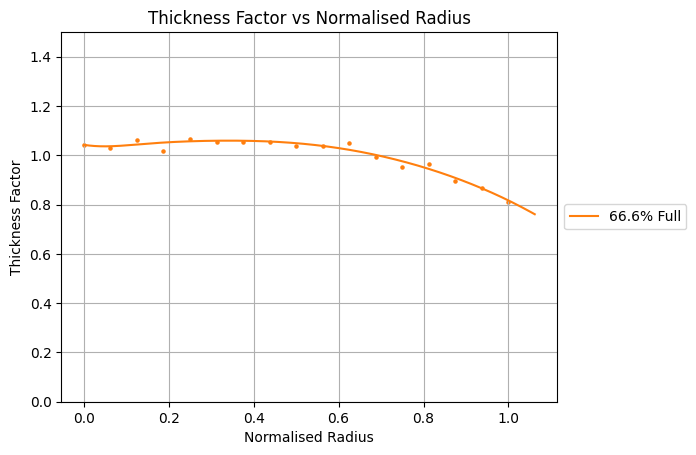

In [26]:
# Plot the results

plot_trained(0.666, color='C1')
plt.scatter(radii_norm, thickness_factors2, s=5, color='C1')
plt.xlabel('Normalised Radius')
plt.ylabel('Thickness Factor')
plt.title('Thickness Factor vs Normalised Radius')
plt.ylim(0, 1.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

54/54 [==============================] - 0s 623us/step


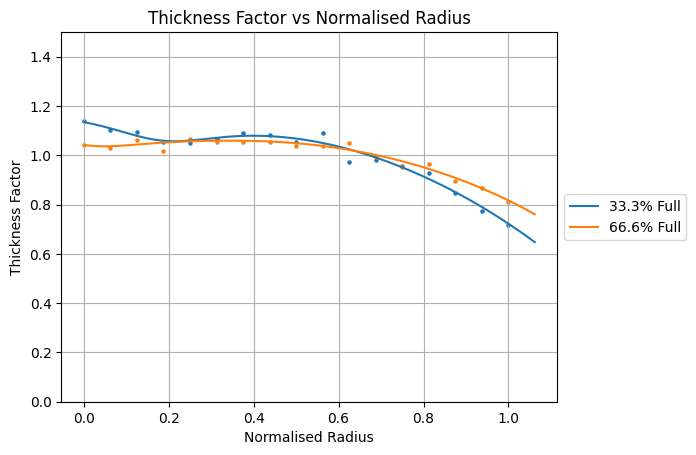

In [27]:
# Plot the results

plot_trained(0.333)
plot_trained(0.666)
plt.scatter(radii_norm, thickness_factors1, s=5)
plt.scatter(radii_norm, thickness_factors2, s=5)
plt.xlabel('Normalised Radius')
plt.ylabel('Thickness Factor')
plt.title('Thickness Factor vs Normalised Radius')
plt.ylim(0, 1.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

54/54 [==============================] - 0s 604us/step


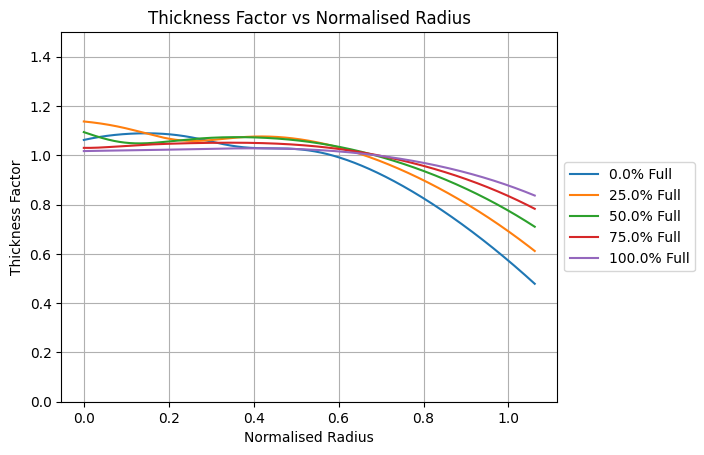

In [28]:
# Plot the results

for i in np.linspace(0, 1, 5):
    plot_trained(i)
plt.xlabel('Normalised Radius')
plt.ylabel('Thickness Factor')
plt.title('Thickness Factor vs Normalised Radius')
plt.ylim(0, 1.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()